# Departamento de Marketing


### Importação das bibliotecas

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Importação da base de dados

In [41]:
base = pd.read_csv("CC GENERAL.csv")

In [42]:
# Formato
base.shape

(8950, 18)

In [43]:
# Visualização 
base.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
# Informações Gerais
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [45]:
# Descrição Estatística
base.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [46]:
# Buscando um registro específico
base[base['ONEOFF_PURCHASES']==40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [47]:
# Buscando um registro específico
base[base['CASH_ADVANCE']==47137.211760000006	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Análise Exploratória dos Dados

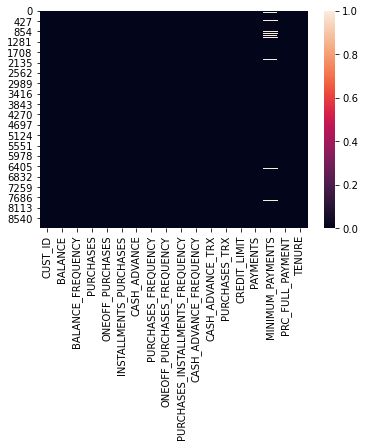

In [48]:
# Busca por valores nulos
sns.heatmap(base.isnull());

In [49]:
# Contagem de valores nulos
base.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [50]:
# Tratamento dos valores nulos (média)

base.loc[(base['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = base['MINIMUM_PAYMENTS'].mean()

In [51]:
# Tratamento dos valores nulos (média)

base.loc[(base['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = base['CREDIT_LIMIT'].mean()

In [52]:
# Verificando duplicados
base.duplicated().sum()

0

In [53]:
# Apagando o ID
base.drop('CUST_ID',axis = 1, inplace = True)

C:\Users\Pedro\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


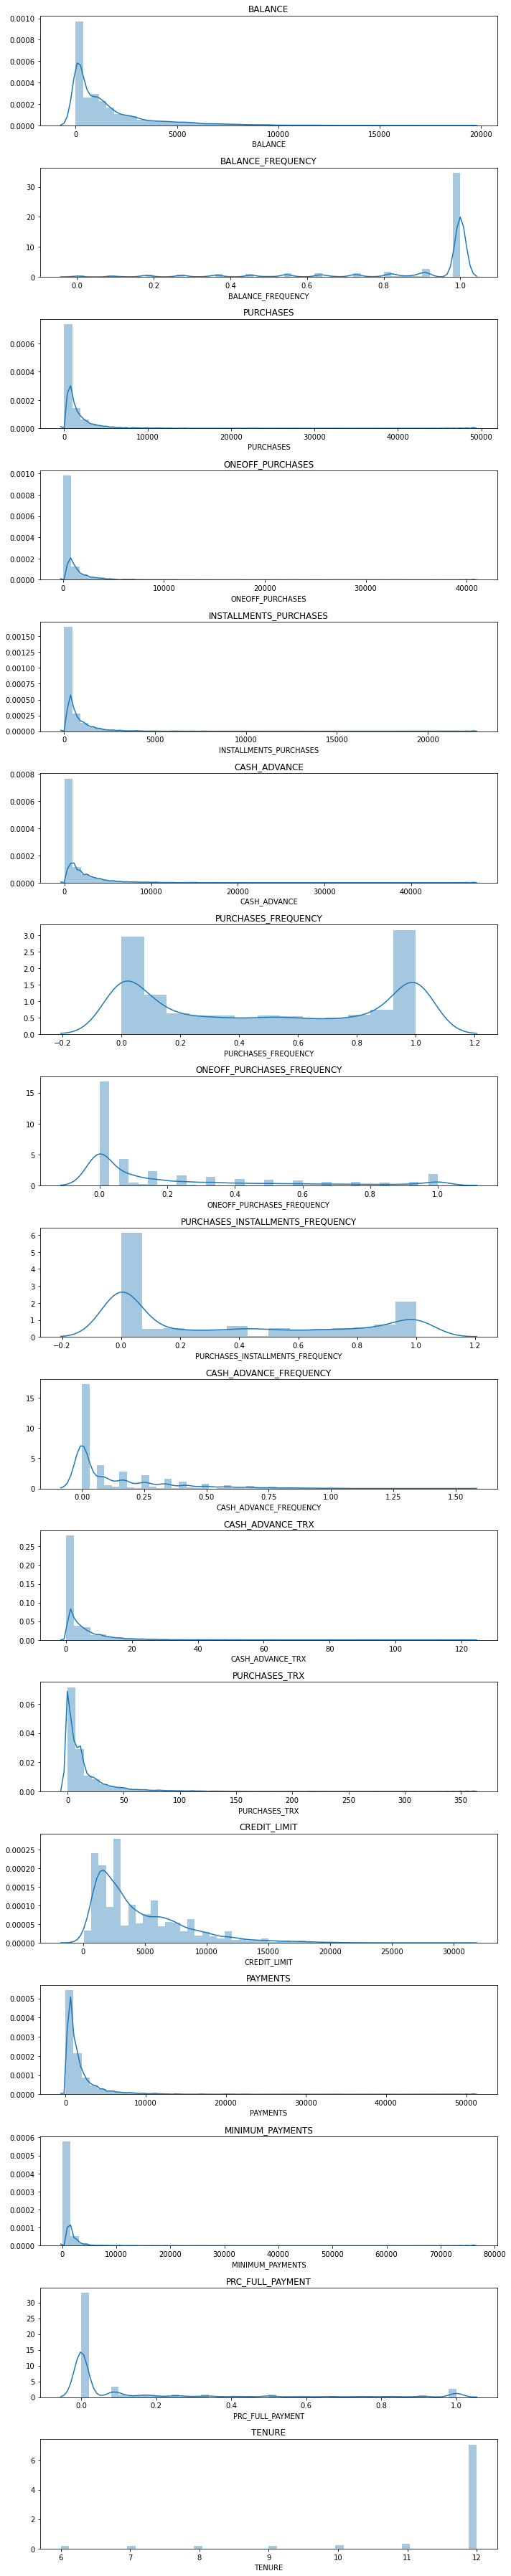

In [54]:
# Visualizando os gráficos
plt.figure(figsize =(10,50))
for i in range(len(base.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(base[base.columns[i]], kde = True)
    plt.title(base.columns[i])
    
plt.tight_layout();
    

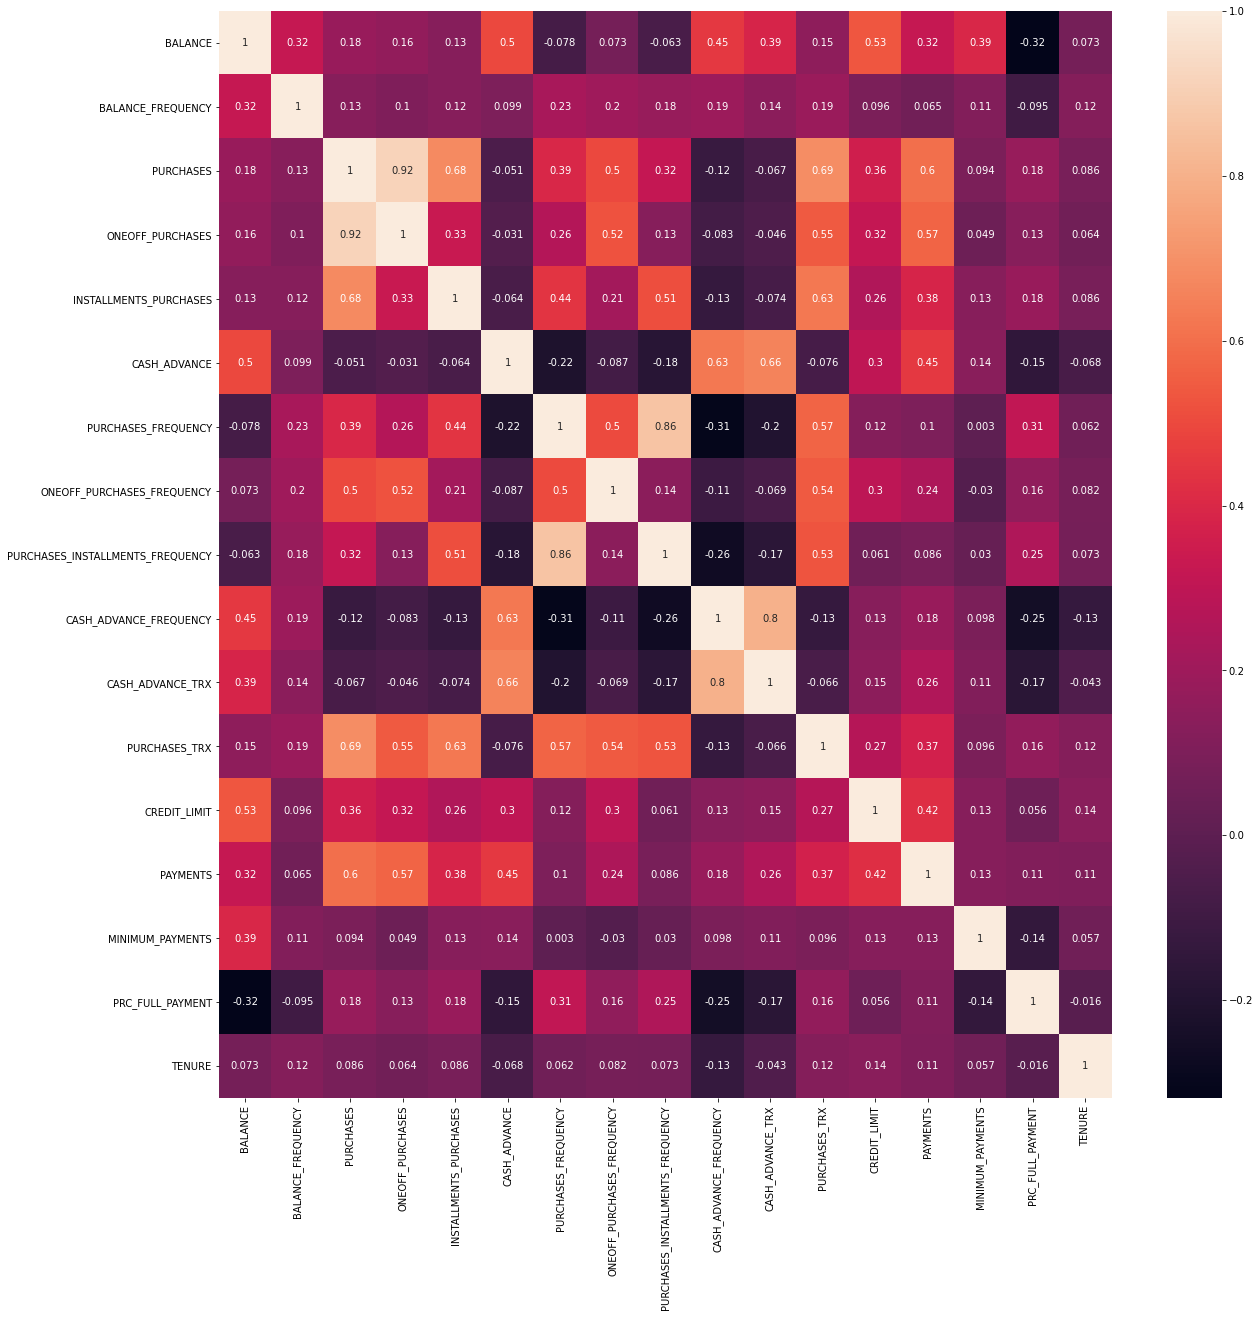

In [55]:
# Correlações

cor = base.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(cor, annot = True)

### Definição do Número de Clusters

In [56]:
# Padronização da Base de dados (necessário pra algoritmos de distância)
scaler = StandardScaler()
base_pad = scaler.fit_transform(base) 
# Quando esse comando é executado, ele vira um numpy array (acessar pelo índice)

In [57]:
# Implementação do Elbow Method
'''
wcss_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(base_pad)
    wcss_1.append(kmeans.inertia_)
   ''' 

'\nwcss_1 = []\nrange_values = range(1,20)\nfor i in range_values:\n    kmeans = KMeans(n_clusters = i)\n    kmeans.fit(base_pad)\n    wcss_1.append(kmeans.inertia_)\n   '

Text(0, 0.5, 'Wcss')

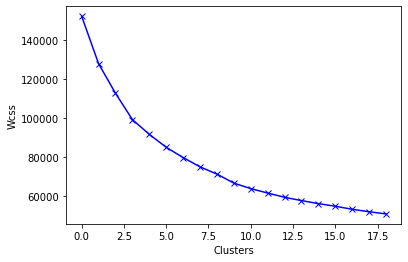

In [58]:
# Geração do grafico
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Wcss')

### Implementação do K-Means

In [59]:
# Criação do modelo e clusterização dos registros
kmeans = KMeans(n_clusters = 8)
kmeans.fit(base_pad)
labels = kmeans.labels_

In [60]:
# Visualização de quantos registros existem por label (grupo)
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2019, 2748,  364, 1121,  623, 1182,   25,  868], dtype=int64))

In [61]:
# Visualização dos clusters
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [base.columns])
cluster_centers
                               

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.365233,0.332611,-0.036620,-0.242293,0.358358,-0.363759,0.990011,-0.383092,1.201490,-0.473749,-0.360147,0.187437,-0.259745,-0.216599,-0.052469,0.312761,0.256362
1,0.014432,0.403892,-0.357494,-0.241826,-0.400901,-0.094605,-0.855483,-0.395138,-0.756854,0.104224,-0.027607,-0.482379,-0.303769,-0.250364,-0.005616,-0.455544,0.273361
2,1.055994,0.468427,2.432260,1.771826,2.495934,-0.147328,1.168536,1.535165,1.279606,-0.272765,-0.143949,3.075885,1.274951,1.426513,0.731971,0.238241,0.338098
3,-0.138532,0.399815,0.538909,0.669476,0.044116,-0.331607,0.977715,1.902881,0.166657,-0.414873,-0.330710,0.615287,0.427628,0.142775,-0.159068,0.447297,0.268691
4,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
5,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
7,1.684219,0.392305,-0.221479,-0.158828,-0.231954,2.019280,-0.477172,-0.209753,-0.417378,1.923348,1.928774,-0.270548,1.028429,0.817976,0.509299,-0.391072,0.068842


In [62]:
# Despadronização
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [base.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,804.272935,0.956063,924.965371,190.281114,735.126475,216.050938,0.887690,0.088174,0.841940,0.040342,0.791089,19.368812,3549.391189,1106.111812,741.929310,0.245192,11.860396
1,1594.513239,0.972949,239.413007,191.055231,48.537929,780.479438,0.147004,0.084580,0.063644,0.156000,3.060430,2.719694,3389.212474,1008.364384,851.118468,0.020476,11.883145
2,3762.436640,0.988237,6199.766676,3533.304973,2668.110055,669.916456,0.959341,0.660427,0.872985,0.080561,2.266484,91.164835,9133.241758,5862.758729,2570.034179,0.223396,11.969780
3,1276.131814,0.971983,2154.591713,1703.630955,450.960758,283.476264,0.882755,0.770124,0.430671,0.052124,0.991971,30.003568,6050.336550,2146.462207,493.506059,0.284541,11.876896
4,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
5,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,265.852622,0.236172,11.783418
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
7,5070.033668,0.970204,530.011855,328.814908,201.314078,5213.394988,0.298839,0.139884,0.198561,0.520026,16.411290,7.985023,8236.295559,4101.105558,2051.105515,0.039333,11.609447


In [65]:
# Dividindo os clientes pelos clusters
base_cluster = pd.concat([base,pd.DataFrame({'CLUSTER':labels})], axis = 1)
base_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


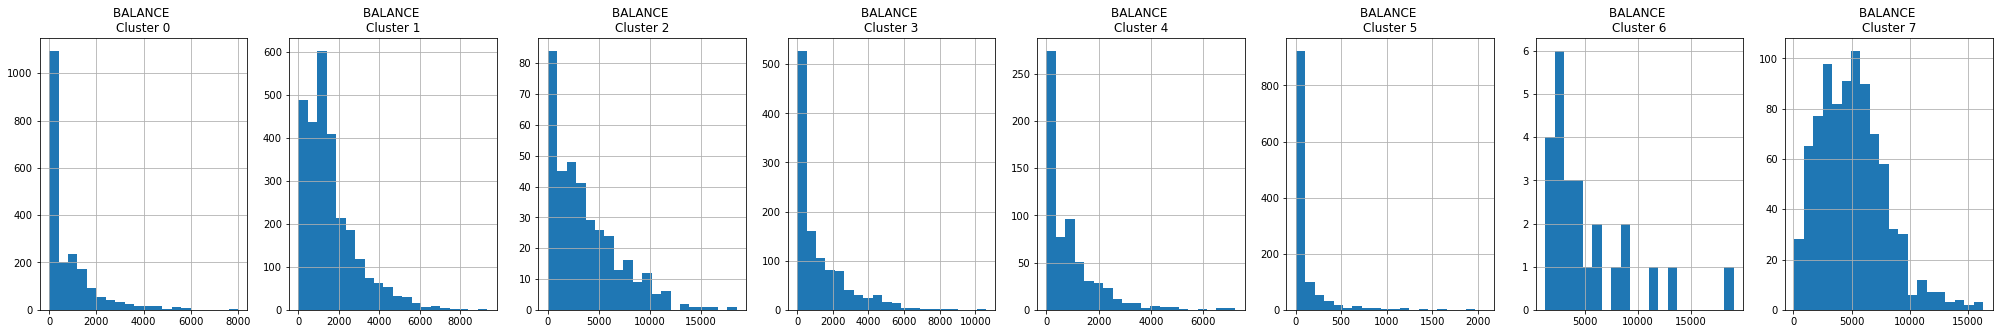

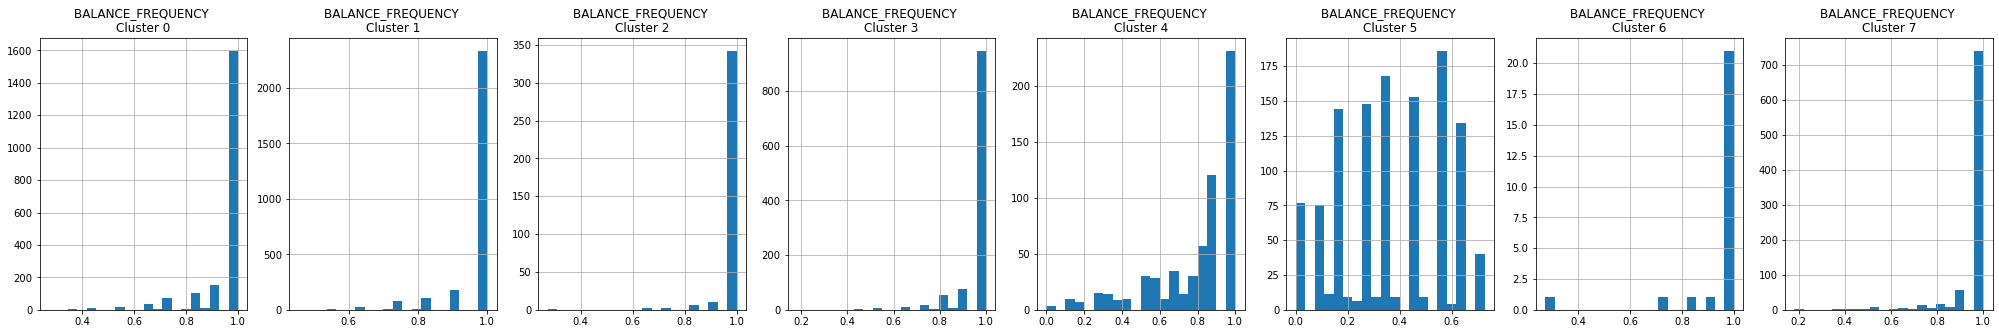

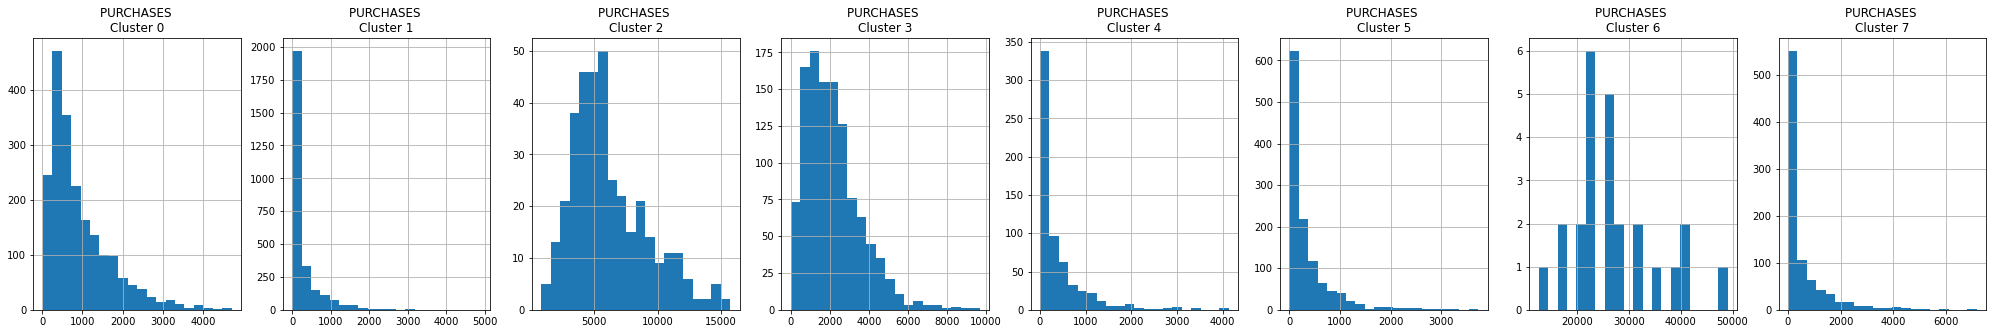

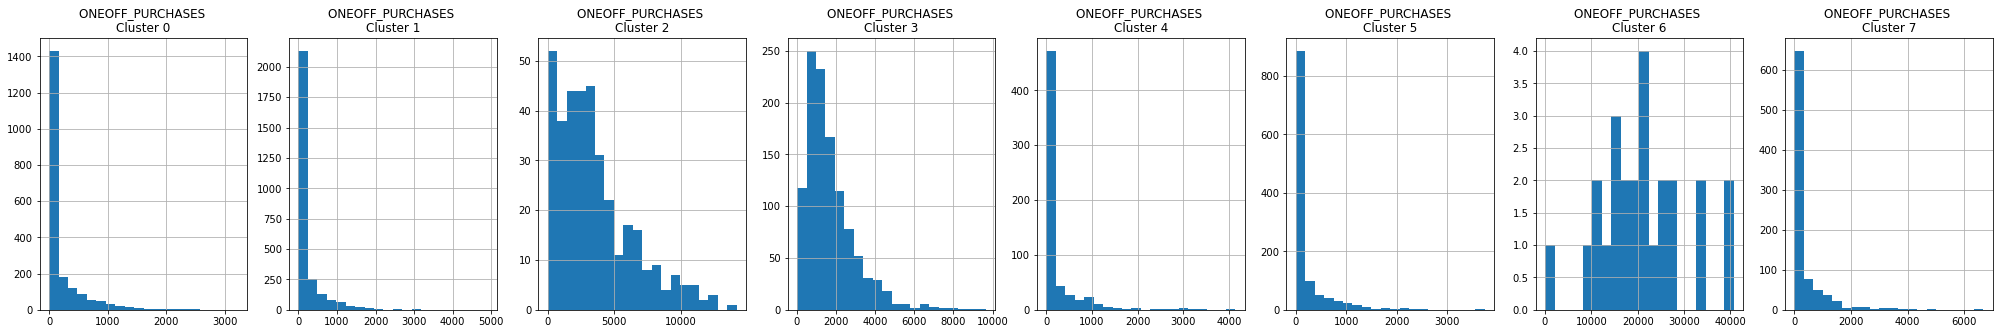

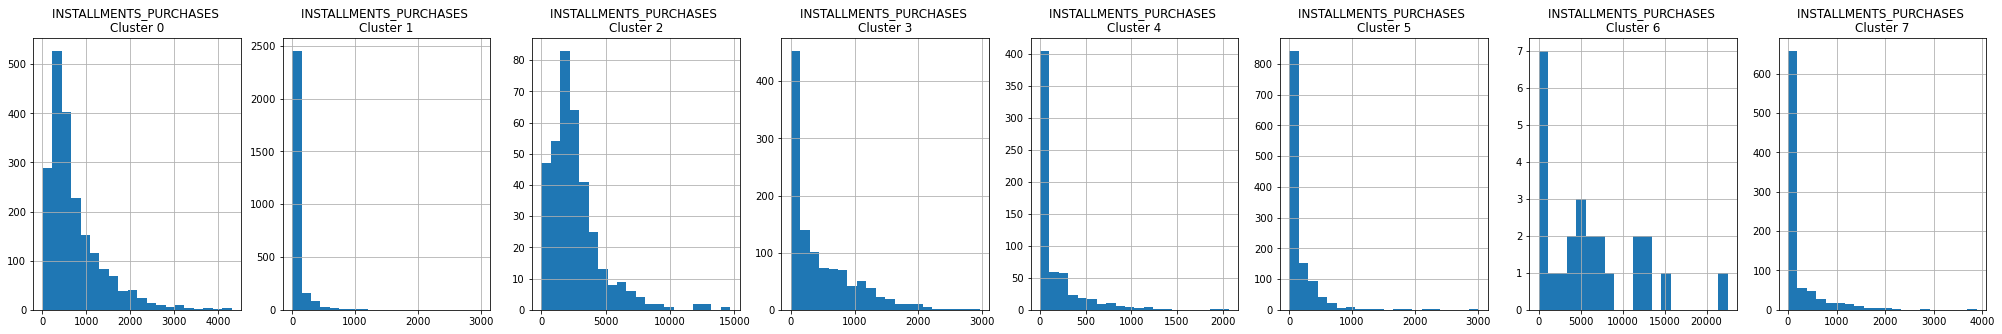

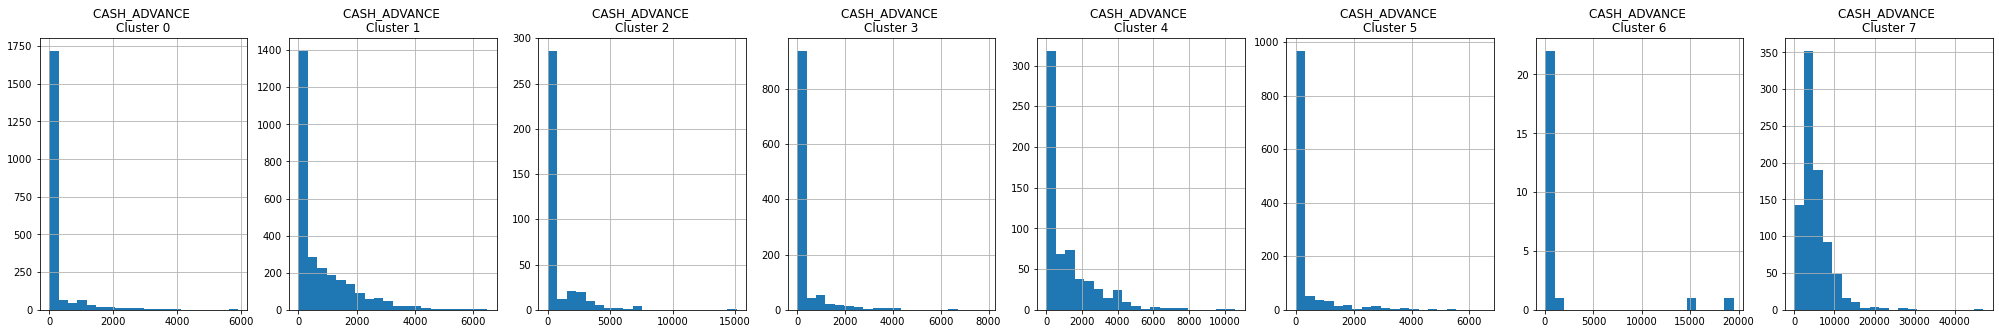

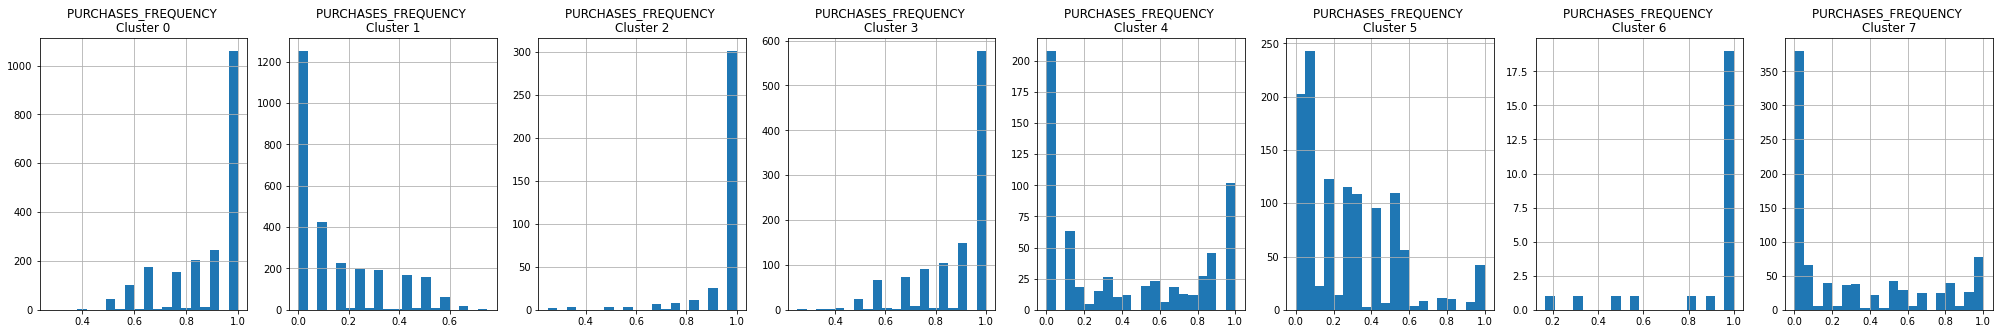

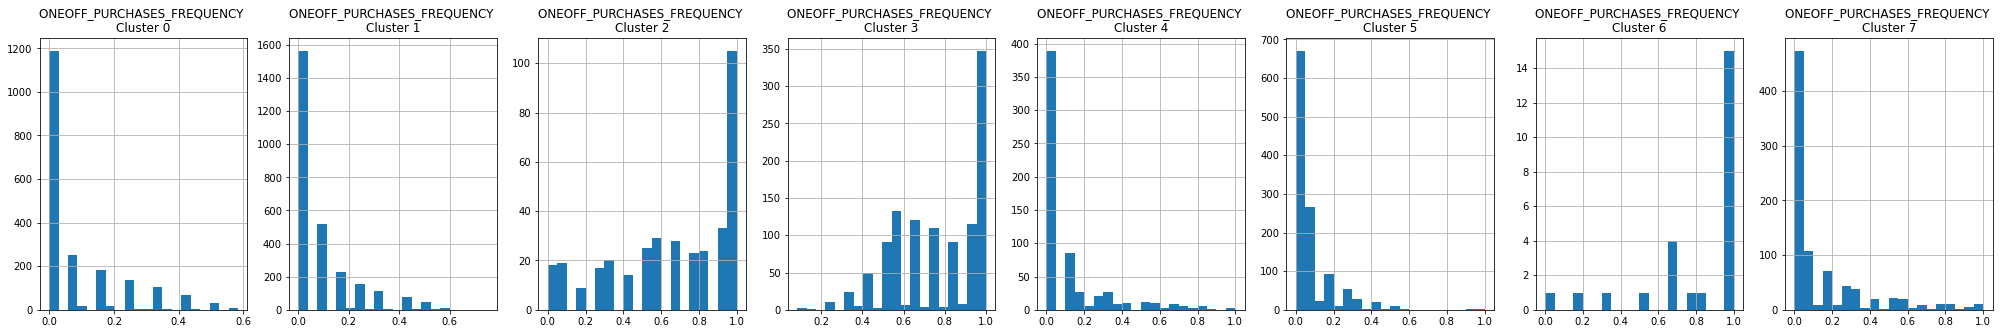

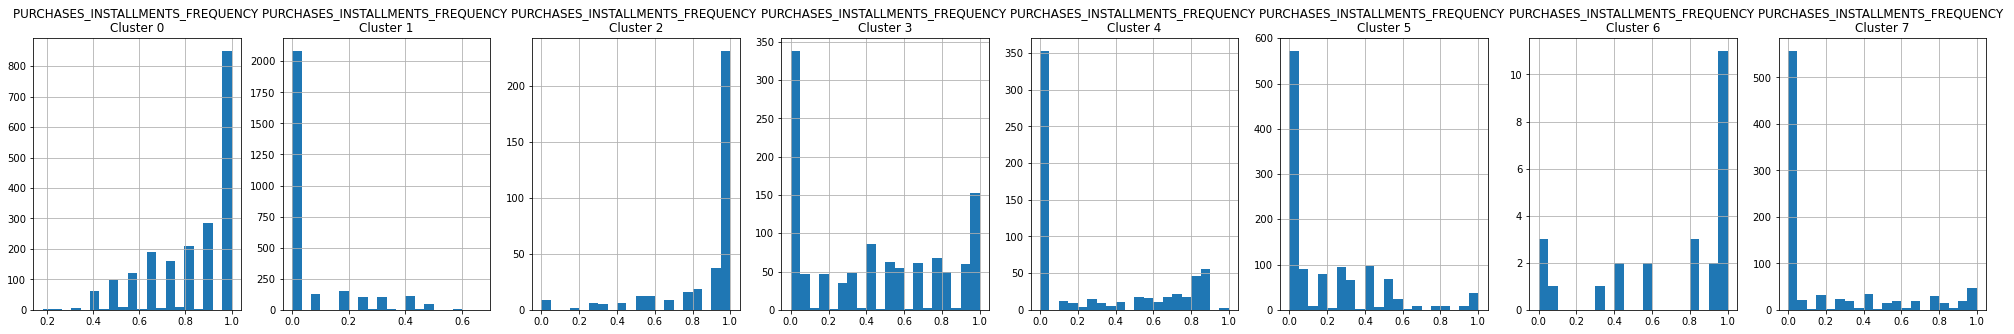

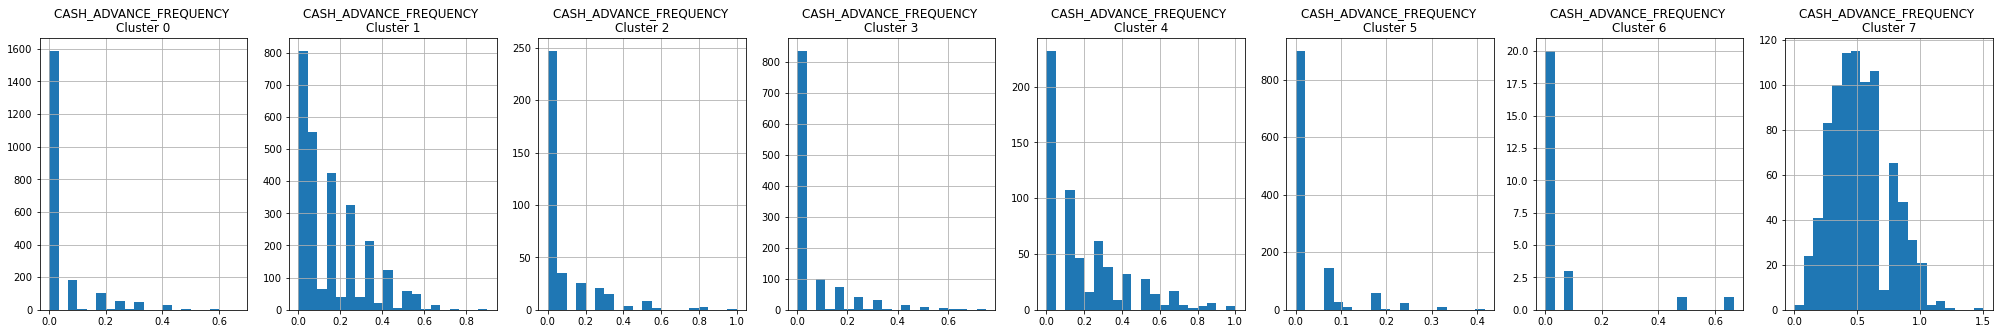

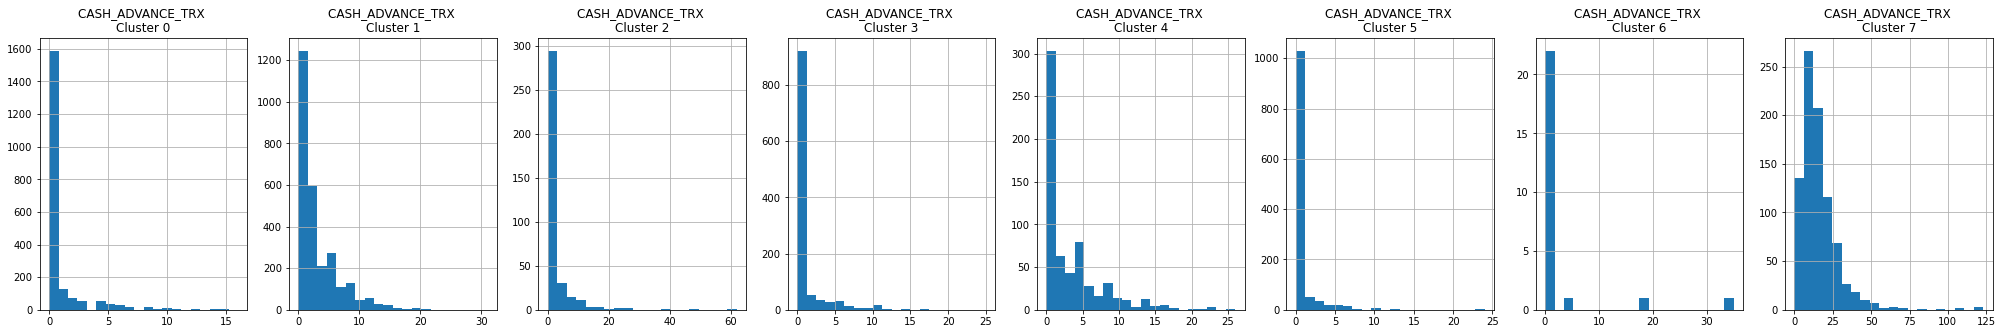

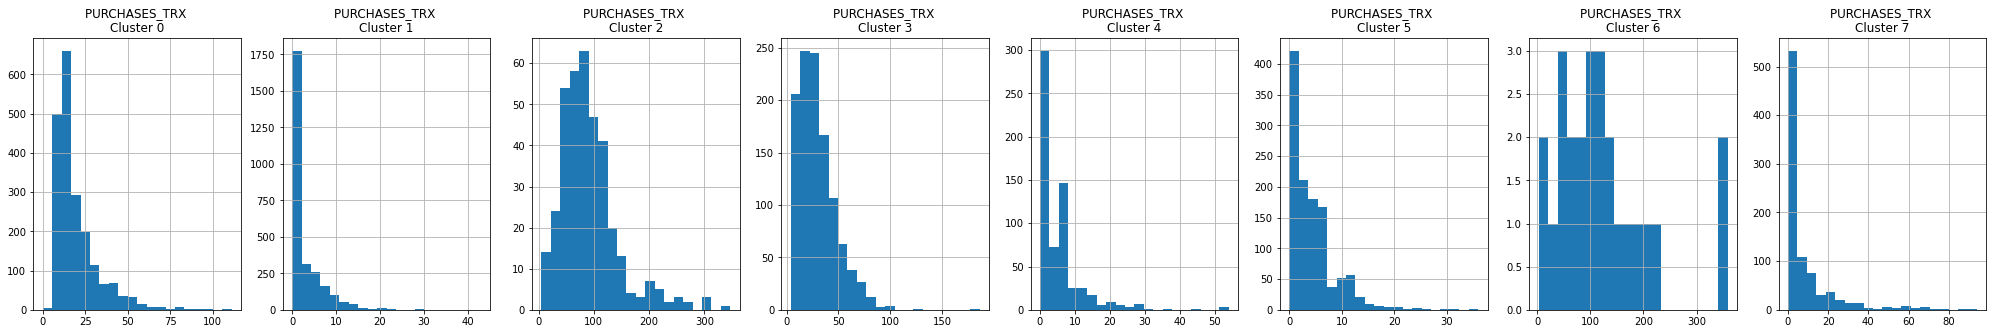

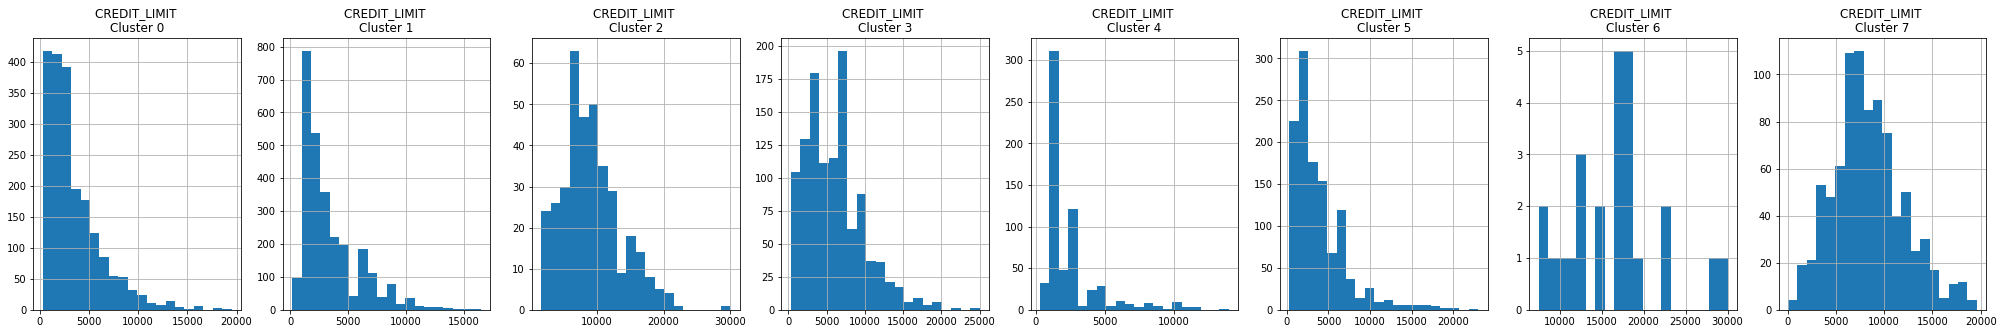

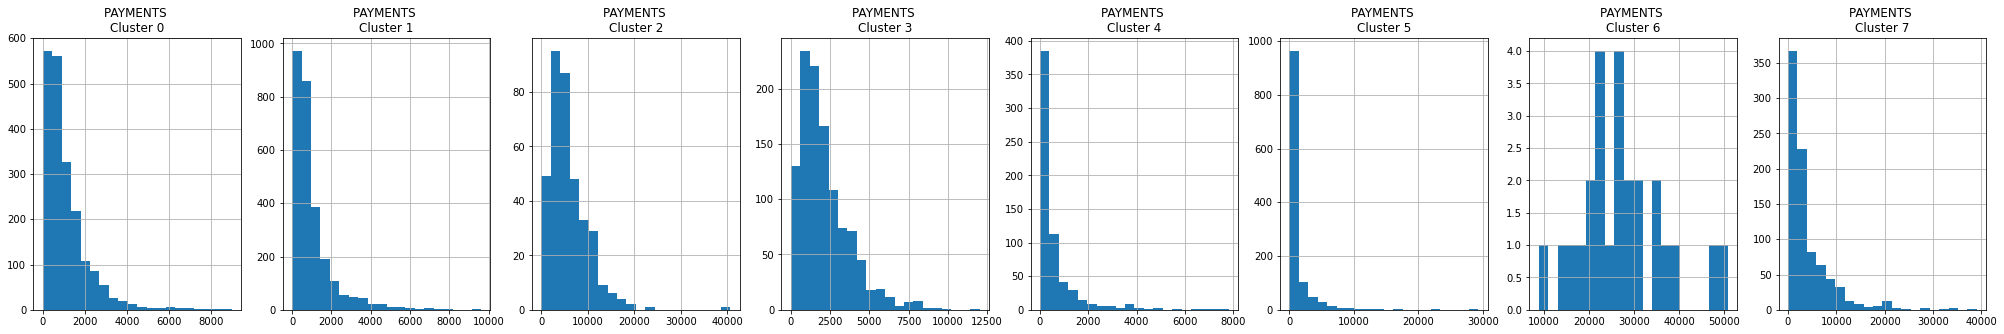

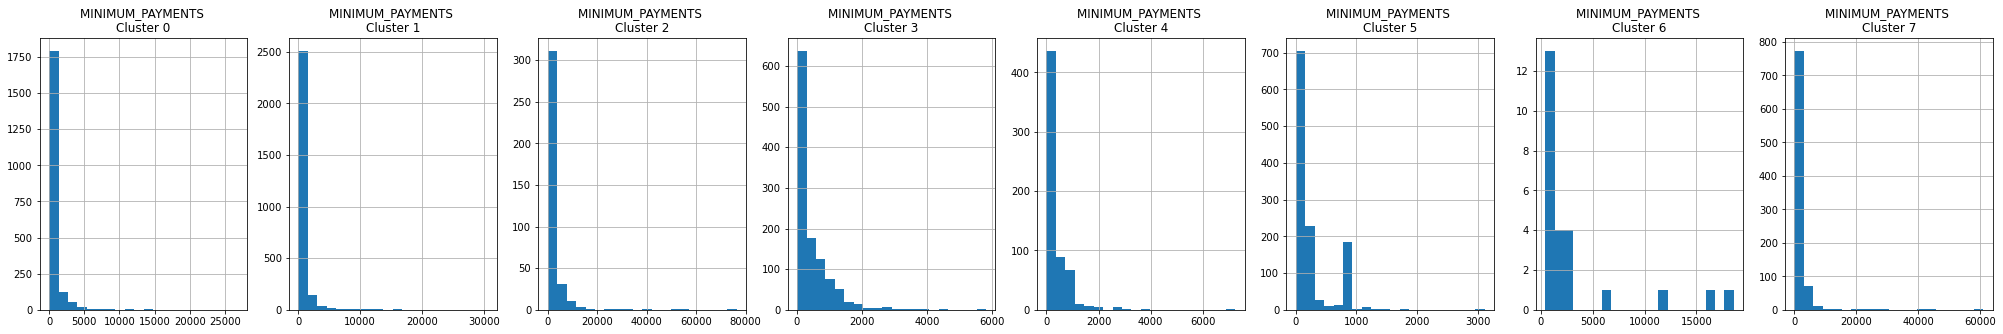

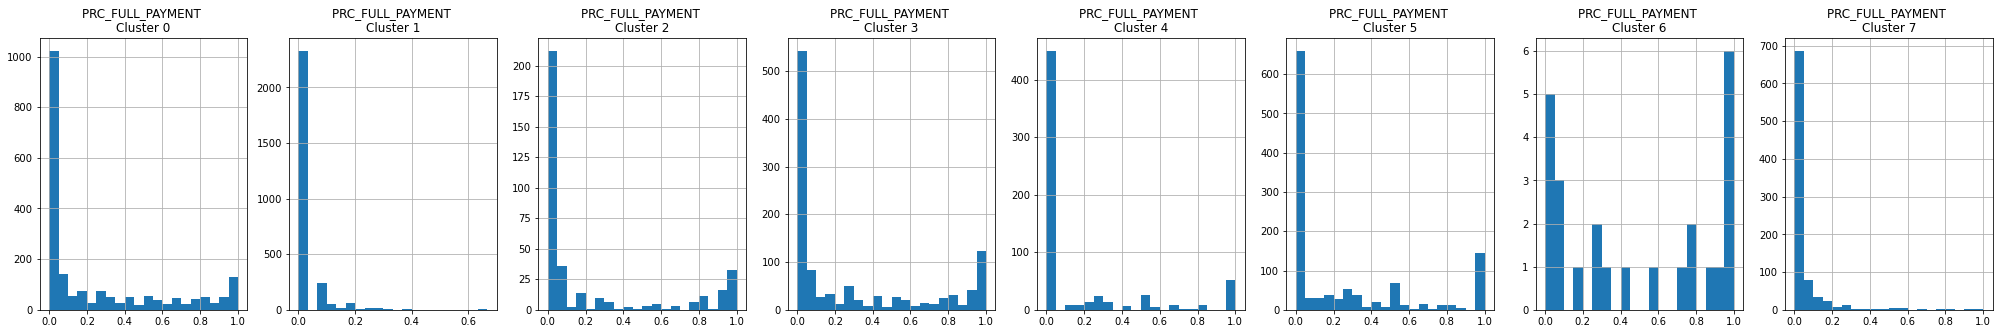

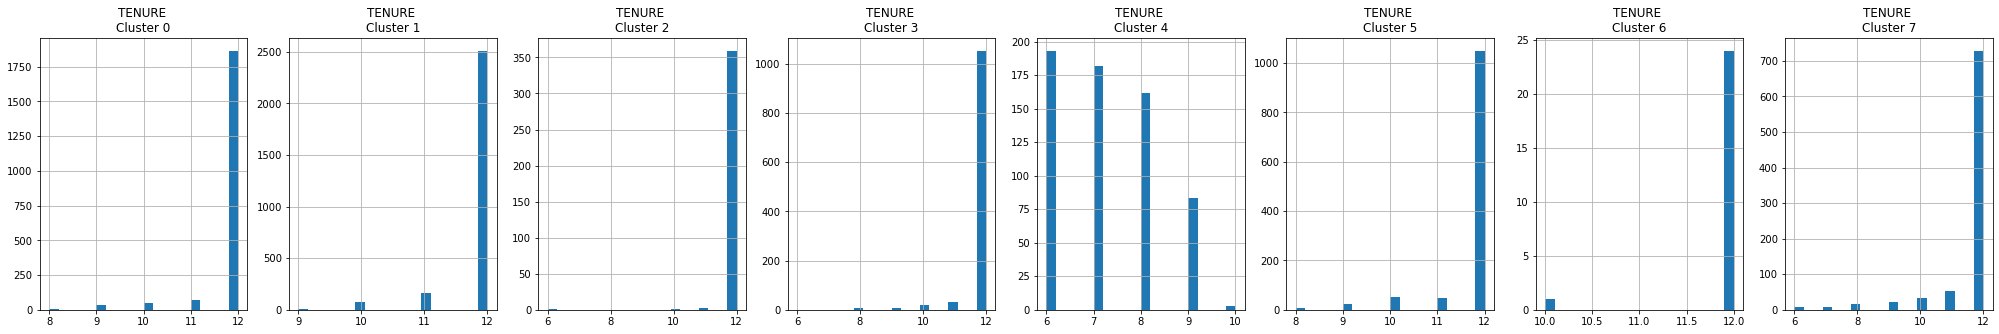

In [67]:
# Visualização
for i in base.columns:
    plt.figure(figsize = (35,5))
    for j in range(8):
        plt.subplot(1,8,j + 1)
        cluster = base_cluster[base_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format (i, j))
    plt.show()
        

In [70]:
# Ordenando
base_ordenada = base_cluster.sort_values(by = 'CLUSTER')


In [71]:
# Salvando
base_ordenada.to_csv('cluster.csv')

### PCA

In [72]:
# Redução para os principais componentes
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(base_pad)
principal_comp

array([[-1.68222077, -1.07645389],
       [-1.13829542,  2.50647141],
       [ 0.96968579, -0.38351624],
       ...,
       [-0.92620419, -1.81078779],
       [-2.33655269, -0.65796729],
       [-0.55642114, -0.40045924]])

In [73]:
# Transoformação em dataframe
base_pca = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

In [74]:
# Concatenação
base_pca = pd.concat([base_pca, pd.DataFrame({'cluster': labels})], axis = 1)

In [ ]:
 #Visualização
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = base_pca, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'black', 'gray', 'purple'])

### Auto Encoders

#### Sequência de Passos: Redução (AutoEncoder) -> Elbow Method -> K-Means -> PCA

##### Estrutura do AutoEncoder:
* 17 neurônios (entrada).
* 500 neurônios (aumentar porque existem poucas entradas).
* 2000 neurônios 
* 10 neurônios (redução de interesse)
* 2000 neurônios
* 500 neurônios
* 17 neurônios (decodificação)

In [80]:
# Importação das bibliotecas
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [82]:
# Estrutura
input_base = Input(shape = (17,))
x = Dense(500, activation = 'relu')(input_base)
x = Dense(2000, activation = 'relu')(x)

encoded = Dense(10, activation = 'relu')(x)

x = Dense(2000, activation = 'relu')(encoded)
x = Dense(500, activation = 'relu')(x)

decoded = Dense(17)(x)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [83]:
# Criação do modelo
autoencoder = Model(input_base, decoded)


In [84]:
# Obtendo os dados codificados
encoder = Model(input_base, encoded)

In [85]:
# Compilação
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [86]:
# Treinamento
autoencoder.fit(base_pad,base_pad, epochs = 50)

Epoch 1/50
8950/8950 [==============================] - 14s 2ms/sample - loss: 0.1823
Epoch 2/50
8950/8950 [==============================] - 11s 1ms/sample - loss: 0.0679
Epoch 3/50
8950/8950 [==============================] - 11s 1ms/sample - loss: 0.0473
Epoch 4/50
8950/8950 [==============================] - 12s 1ms/sample - loss: 0.0542
Epoch 5/50
8950/8950 [==============================] - 11s 1ms/sample - loss: 0.0685
Epoch 6/50
8950/8950 [==============================] - 10s 1ms/sample - loss: 0.0393
Epoch 7/50
8950/8950 [==============================] - 12s 1ms/sample - loss: 0.0346
Epoch 8/50
8950/8950 [==============================] - 11s 1ms/sample - loss: 0.0503
Epoch 9/50
8950/8950 [==============================] - 12s 1ms/sample - loss: 0.0296
Epoch 10/50
8950/8950 [==============================] - 11s 1ms/sample - loss: 0.0282
Epoch 11/50
8950/8950 [==============================] - 13s 1ms/sample - loss: 0.0272
Epoch 12/50
8950/8950 [=============================

In [87]:
# Dados compactados
compact = encoder.predict(base_pad)

In [89]:
# Reconstrução do modelo agora com autoencoder
kmeans = KMeans(n_clusters = 4)
kmeans.fit(compact)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
# Clusters
labels = kmeans.labels_

In [92]:
# Concatenação
base_cluster_at = pd.concat([base, pd.DataFrame({'cluster':labels})], axis = 1)

In [95]:
# PCA
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
base_pca = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])


In [96]:
# Concatenação
base_pca = pd.concat([base_pca, pd.DataFrame({'cluster':labels})], axis = 1)

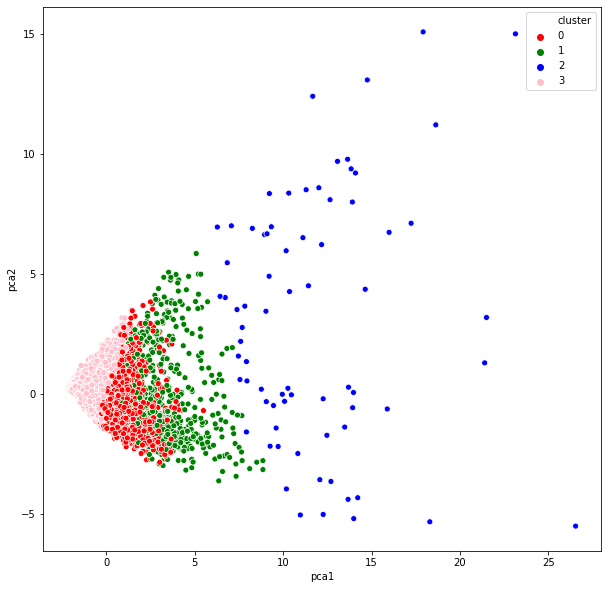

In [99]:
 #Visualização
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = base_pca, palette = ['red', 'green', 'blue', 'pink']);